# DATA MINING PROJECT

## PHASE-1 PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
df_train.shape

(3911, 8)

In [5]:
#Missing Value check
df_train.isna().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [6]:
#Reading a few samples of essay
target_features = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

def read_text(df):
    sample = df.sample(1)
    text = sample['full_text'].values[0]
    scores = sample[target_features].values.tolist()[0]
    return text,scores

for _ in range(2):
    print(f"\n\n{'=='*20}\n\n")
    text,scores = read_text(df_train)
    for i,score in enumerate(target_features):
        print(f"{score}: {scores[i]}")
    print(f"total: {sum(scores)}")
    print(f'\n{"--"*20}\n')
    print(text)





cohesion: 3.0
syntax: 2.5
vocabulary: 3.5
phraseology: 2.5
grammar: 2.0
conventions: 2.5
total: 16.0

----------------------------------------

When you are a kid your parents tell you what your character is have to be they teaching you how you have to be they intent to help you to be a better person, for example they tell you what is wrong and what not, what you can do and what you can't do.

But when you are a big person you can choose whoever your character is gonna be, for example you choose what is wrong and what is good for you because you are big now and you can do your own decision. You're able to thing and get the responsibilities to choose your own character, and you are agree if you make a mistake your gonna take the consequences, because your choose to be like that.

So is not beyond our control because you thing how you wanna be for your life for the things you are learned before in the past and that is the things the changing you. is nothing out of control because you

In [7]:
df_train.describe(include='object')

,text_id,full_text
count,3911,3911
unique,3911,3911
top,0016926B079C,I think that students would benefit from learn...
freq,1,1


In [8]:
df_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
def text_cleaning(text):  
    
    # tokenizing text 
    tokens = word_tokenize(text)
    
    # converting list to string
    text = ' '.join(tokens)
    
    # convert text to lowercase and remove leading/trailing white space
    text = ''.join(text.lower().strip()) 
    
    # remove newlines, tabs, and extra white spaces
    text = re.sub('\n|\r|\t', ' ', text)
    text = re.sub(' +', ' ', text)

    # remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
    cleaned_text = ''.join([char for char in cleaned_text if char not in string.punctuation])
    
    cleaned_tokens = cleaned_text.split()
    
    return cleaned_tokens

# apply the text_cleaning function to the 'full_text' column using apply() method
df_train['cleaned_tokenize_text'] = df_train['full_text'].apply(text_cleaning)

df_train['cleaned_tokenize_text'][0]


['think',
 'students',
 'would',
 'benefit',
 'learning',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'taking',
 'classes',
 'helps',
 'house',
 'll',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'getting',
 'ready',
 'wake',
 'go',
 'brush',
 'teeth',
 'go',
 'closet',
 'look',
 'cloths',
 'think',
 'picked',
 'outfit',
 'u',
 'go',
 'look',
 'mirror',
 'youll',
 'either',
 'like',
 'look',
 'see',
 'stain',
 'll',
 'change',
 'online',
 'classes',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'students',
 'usually',
 'take',
 'showers',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'students',
 'smell',
 'good',
 'causes',
 'miss',
 'bus',
 'effects',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'u',
 'online',
 'classes',
 'u',
 'wont',
 'need',
 'miss',
 'lessons',
 'cause',
 'get',
 'everything',
 'set',
 'go',
 'take',
 'shower',
 'u',
 'get',
 'ready',
 'go

In [10]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"[think, students, would, benefit, learning, ho..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"[problem, change, let, best, matter, happening..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"[dear, principal, u, change, school, policy, g..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"[best, time, life, become, agree, greatest, ac..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"[small, act, kindness, impact, people, change,..."


In [11]:
# initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to apply lemmatization with POS tagging to each word
def lemmatize_with_pos(word):
    pos = get_wordnet_pos(word)
    if pos:
        return lemmatizer.lemmatize(word, pos=pos)
    else:
        return lemmatizer.lemmatize(word)

# define a function to get the appropriate POS tag for a word
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # default to noun if not found

# define a function to apply lemmatization to each word
def lemmatize_text(text):
    return [lemmatize_with_pos(word) for word in text]

# apply the function to the 'clean_text' column using apply() method
df_train['lemmatized_text'] = df_train['cleaned_tokenize_text'].apply(lambda x: lemmatize_text(x))

df_train['lemmatized_text'][0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'll',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'go',
 'brush',
 'teeth',
 'go',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'u',
 'go',
 'look',
 'mirror',
 'youll',
 'either',
 'like',
 'look',
 'see',
 'stain',
 'll',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'u',
 'online',
 'class',
 'u',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'go',
 'take',
 'shower',
 'u',
 'get',
 'ready',
 'go',
 'home',
 'comfortabl

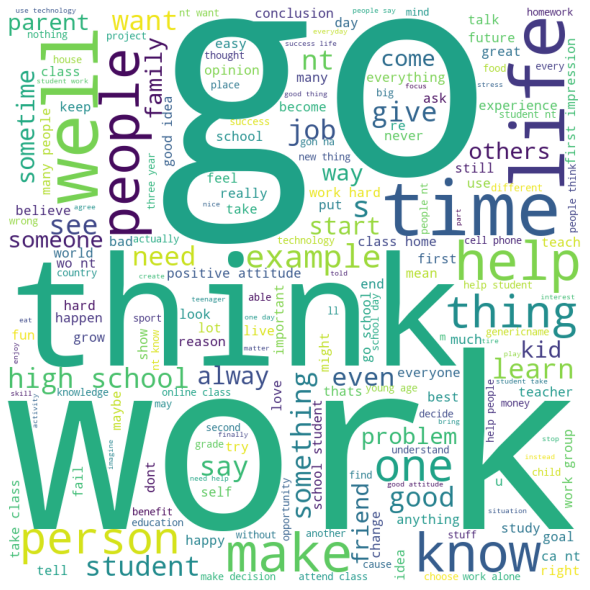

In [12]:
# Convert the list of tokenized words to a string for each row in the column
text = df_train['lemmatized_text'].apply(lambda x: ' '.join(x))

# Join the strings
words = ' '.join(text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [14]:
# Flatten the list of tokenized words
words = [word for sentence in df_train['lemmatized_text'] for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 20 most common words and their frequencies
word_freq.most_common()

[('student', 17146),
 ('people', 15660),
 ('school', 14410),
 ('work', 10984),
 ('get', 10936),
 ('go', 9925),
 ('nt', 9695),
 ('make', 9583),
 ('time', 9274),
 ('want', 8585),
 ('good', 8457),
 ('help', 8438),
 ('like', 8302),
 ('life', 8029),
 ('thing', 7560),
 ('would', 7155),
 ('think', 7005),
 ('class', 6372),
 ('one', 6108),
 ('s', 6104),
 ('well', 5636),
 ('take', 5603),
 ('need', 5585),
 ('know', 5567),
 ('learn', 5540),
 ('also', 5202),
 ('something', 4997),
 ('person', 4721),
 ('example', 4488),
 ('say', 4465),
 ('way', 4444),
 ('day', 4188),
 ('try', 4048),
 ('always', 3925),
 ('give', 3884),
 ('many', 3648),
 ('use', 3404),
 ('lot', 3264),
 ('reason', 3248),
 ('teacher', 3218),
 ('change', 3194),
 ('friend', 3185),
 ('could', 3093),
 ('home', 3058),
 ('first', 3025),
 ('job', 3011),
 ('bad', 2981),
 ('year', 2823),
 ('idea', 2796),
 ('see', 2786),
 ('high', 2691),
 ('really', 2690),
 ('hard', 2616),
 ('others', 2614),
 ('new', 2613),
 ('feel', 2588),
 ('attitude', 2546),
 (

### VISUALIZATIONS

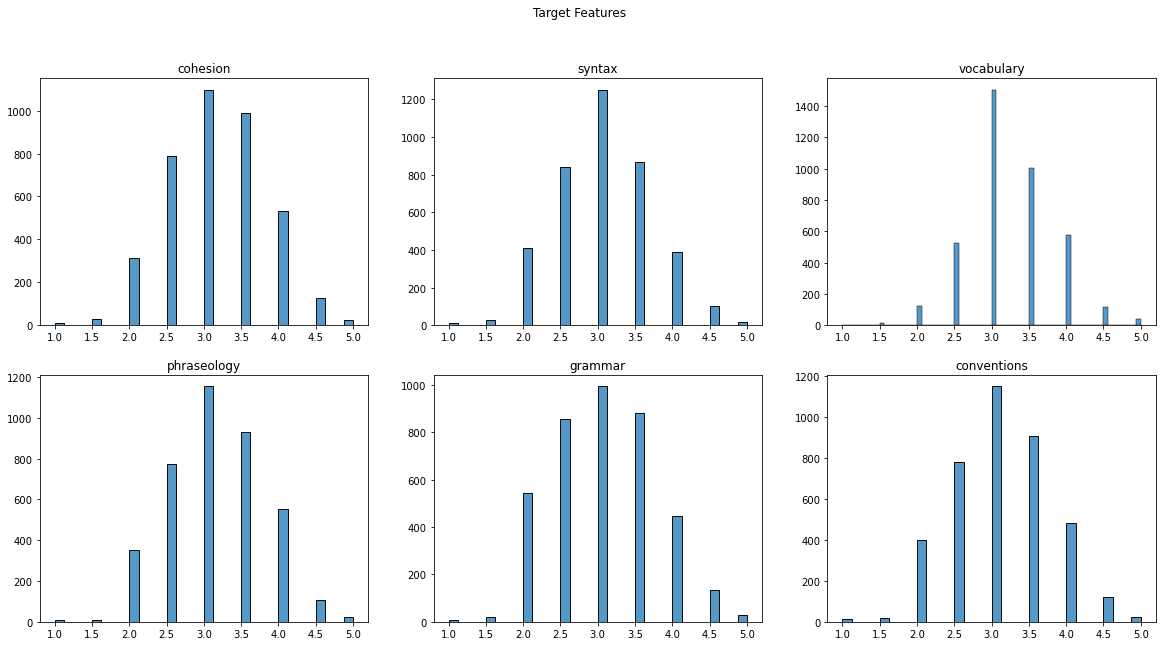

In [23]:
target_features = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
fig, axes = plt.subplots(2,len(target_features)//2, figsize=(20,10))

for i, target in enumerate(target_features):
    ax = axes.flat[i]
    sns.histplot(x=target, data=df_train, ax=ax)
    ax.set_title(target)
    ax.set(xlabel=None, ylabel=None)
    
fig.suptitle('Target Features')
plt.show()

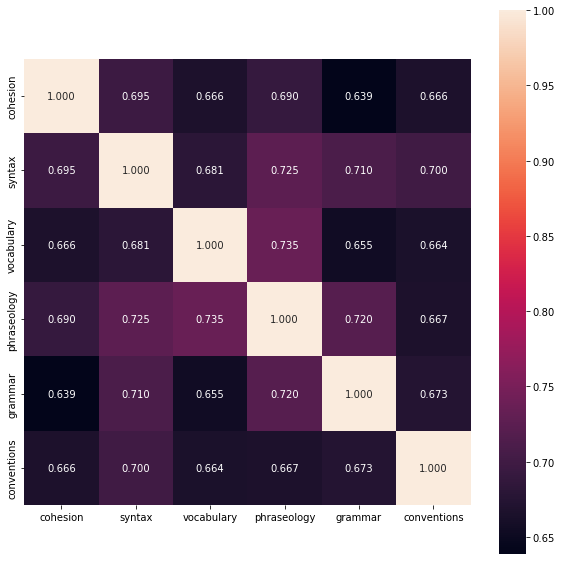

In [28]:
corr = df_train[target_features].corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, annot=True, fmt=".3f")
plt.show()